In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('KAG_energydata_complete.csv')
df


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


1. **Appliances**: Uso de energía en Wh.
2. **Lights**: Uso de energía de los artefactos de iluminación de la casa en Wh.
3. **T1**: Temperatura en el área de la cocina, en Celsius.
4. **RH_1**: Humedad en el área de la cocina, en %.
5. **T2**: Temperatura en área de sala, en Celsius.
6. **RH_2**: Humedad en área de sala, en %.
7. **T3**: Temperatura en área de lavandería, en Celsius.
8. **RH_3**: Humedad en área de lavandería, en %.
9. **T4**: Temperatura en sala de oficina, en Celsius.
10. **RH_4**: Humedad en sala de oficina, en %.
11. **T5**: Temperatura en baño, en Celsius.
12. **RH_5**: Humedad en baño, en %.
13. **T6**: Temperatura exterior del edificio (lado norte), en Celsius.
14. **RH_6**: Humedad fuera del edificio (lado norte), en %.
15. **T7**: Temperatura en habitación de planchado, en Celsius.
16. **RH_7**: Humedad en la habitación de planchado, en %.
17. **T8**: Temperatura en la habitación del adolescente, en Celsius.
18. **RH_8**: Humedad en la habitación del adolescente, en %.
19. **T9**: Temperatura en la habitación de los padres, en Celsius.
20. **RH_9**: Humedad en la habitación de los padres, en %.
21. **To**: Temperatura exterior (de la estación meteorológica de Chievres), en Celsius.
22. **Presión**: Presión (de la estación meteorológica de Chievres), en mm Hg.
23. **RH_out**: Humedad exterior (de la estación meteorológica de Chievres), en %.
24. **Velocidad del viento**: Velocidad del viento (de la estación meteorológica de Chievres), en m/s.
25. **Visibilidad**: Visibilidad (desde la estación meteorológica de Chievres), en km.
26. **Tdewpoint** (no sé qué es eso equisde): desde la estación meteorológica de Chievres, °C.
27. **rv1**: Variable aleatoria 1, adimensional.
28. **rv2**: Variable aleatoria 2, adimensional.

In [3]:
nulls = df.isnull().sum()
nulls

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [4]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
df.drop(columns="lights", inplace=True)

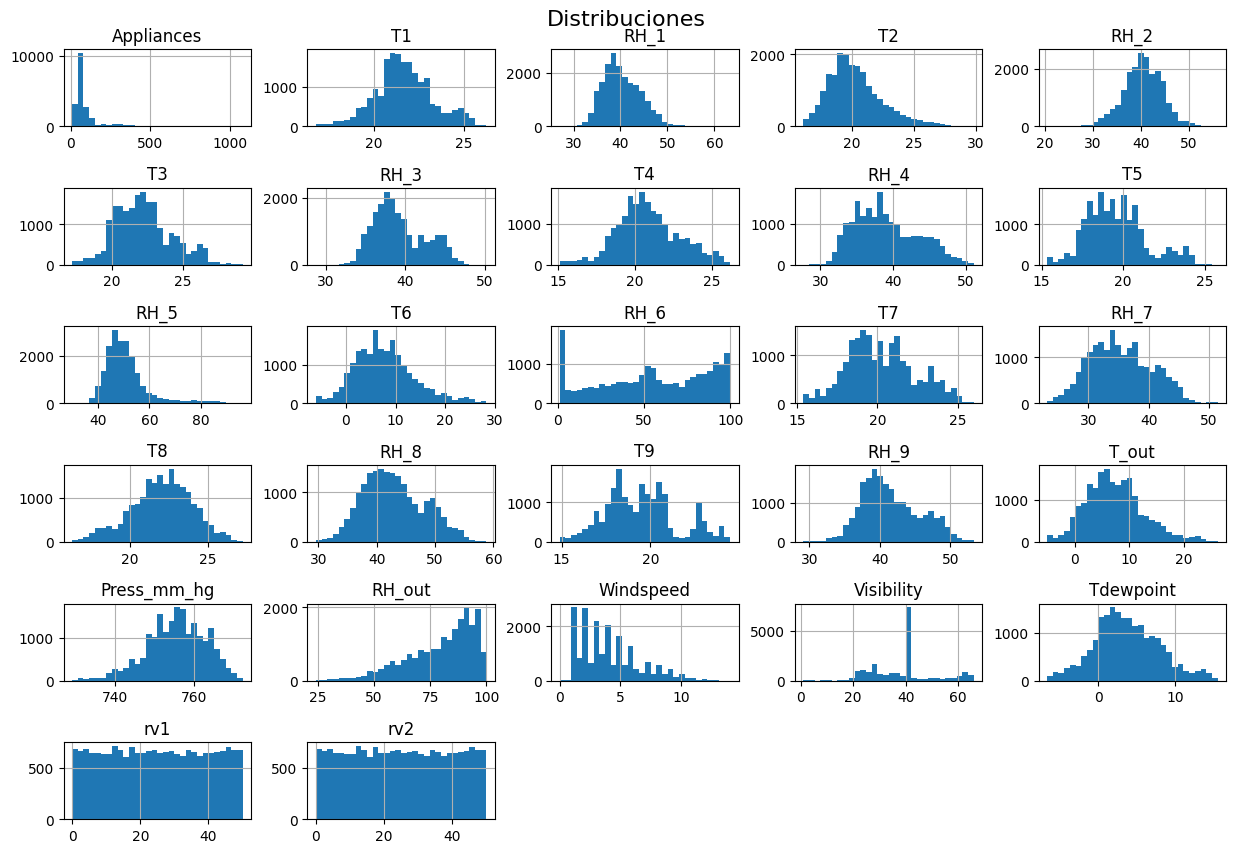

In [6]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribuciones', x=0.5, y=0.92, fontsize=16)
plt.subplots_adjust(hspace=0.8)
plt.show()

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.set_index('date', inplace=True)
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [9]:
df['Mes'] = df.index.month
df['Día (de la semana)'] = df.index.weekday
df['Hora'] = df.index.hour
df['Semana'] = df.index.isocalendar().week
df['Día (del mes)'] = df.index.day


In [10]:
df.tail()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Mes,Día (de la semana),Hora,Semana,Día (del mes)
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,...,3.333333,23.666667,13.333333,43.096812,43.096812,5,4,17,21,27
2016-05-27 17:30:00,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,...,3.500000,24.500000,13.300000,49.282940,49.282940,5,4,17,21,27
2016-05-27 17:40:00,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,...,3.666667,25.333333,13.266667,29.199117,29.199117,5,4,17,21,27
2016-05-27 17:50:00,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,...,3.833333,26.166667,13.233333,6.322784,6.322784,5,4,17,21,27
2016-05-27 18:00:00,430,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,...,4.000000,27.000000,13.200000,34.118851,34.118851,5,4,18,21,27


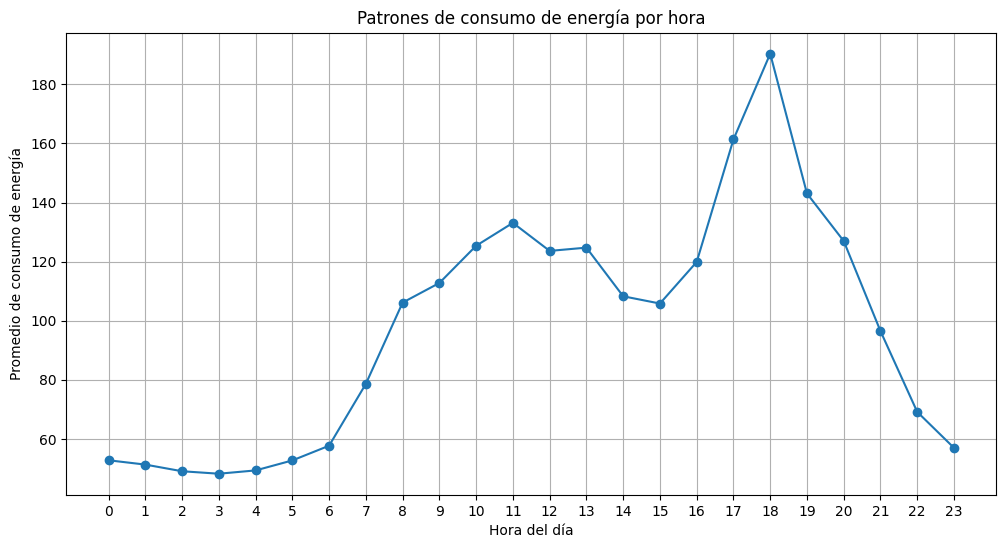

In [11]:
energia_por_hora = df.groupby('Hora')['Appliances'].mean()


plt.figure(figsize=(12, 6))
plt.plot(energia_por_hora.index, energia_por_hora.values, marker='o', linestyle='-')
plt.title('Patrones de consumo de energía por hora')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de consumo de energía')
plt.xticks(range(24))
plt.grid(True)
plt.show()

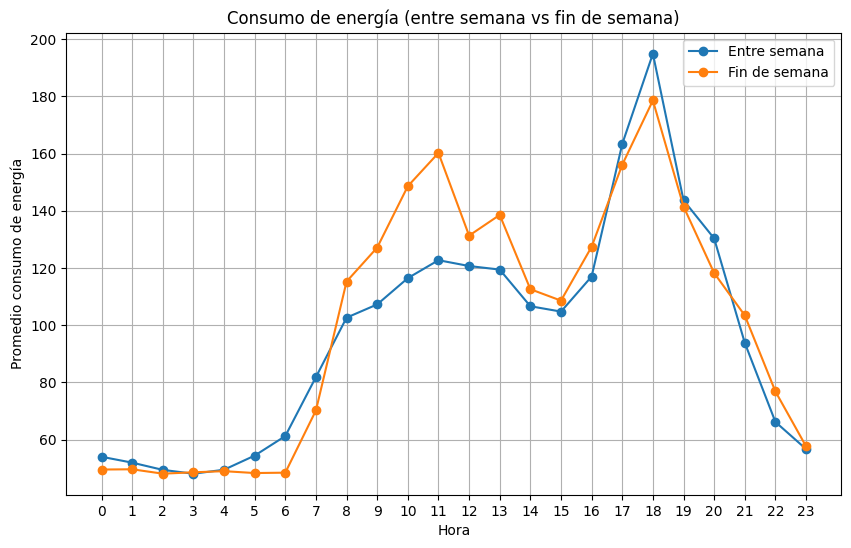

In [12]:
plt.figure(figsize=(10, 6))

energia_entre_semana = df[df['Día (de la semana)'] < 5].groupby('Hora')['Appliances'].mean()
energia_fin = df[df['Día (de la semana)'] >= 5].groupby('Hora')['Appliances'].mean()

# Plot energy consumption for weekdays and weekends
plt.plot(energia_entre_semana.index, energia_entre_semana.values, label='Entre semana', marker='o')
plt.plot(energia_fin.index, energia_fin.values, label='Fin de semana', marker='o')

plt.title('Consumo de energía (entre semana vs fin de semana)')
plt.xlabel('Hora')
plt.ylabel('Promedio consumo de energía')
plt.xticks(range(24))
plt.grid(True)
plt.legend()

plt.show()

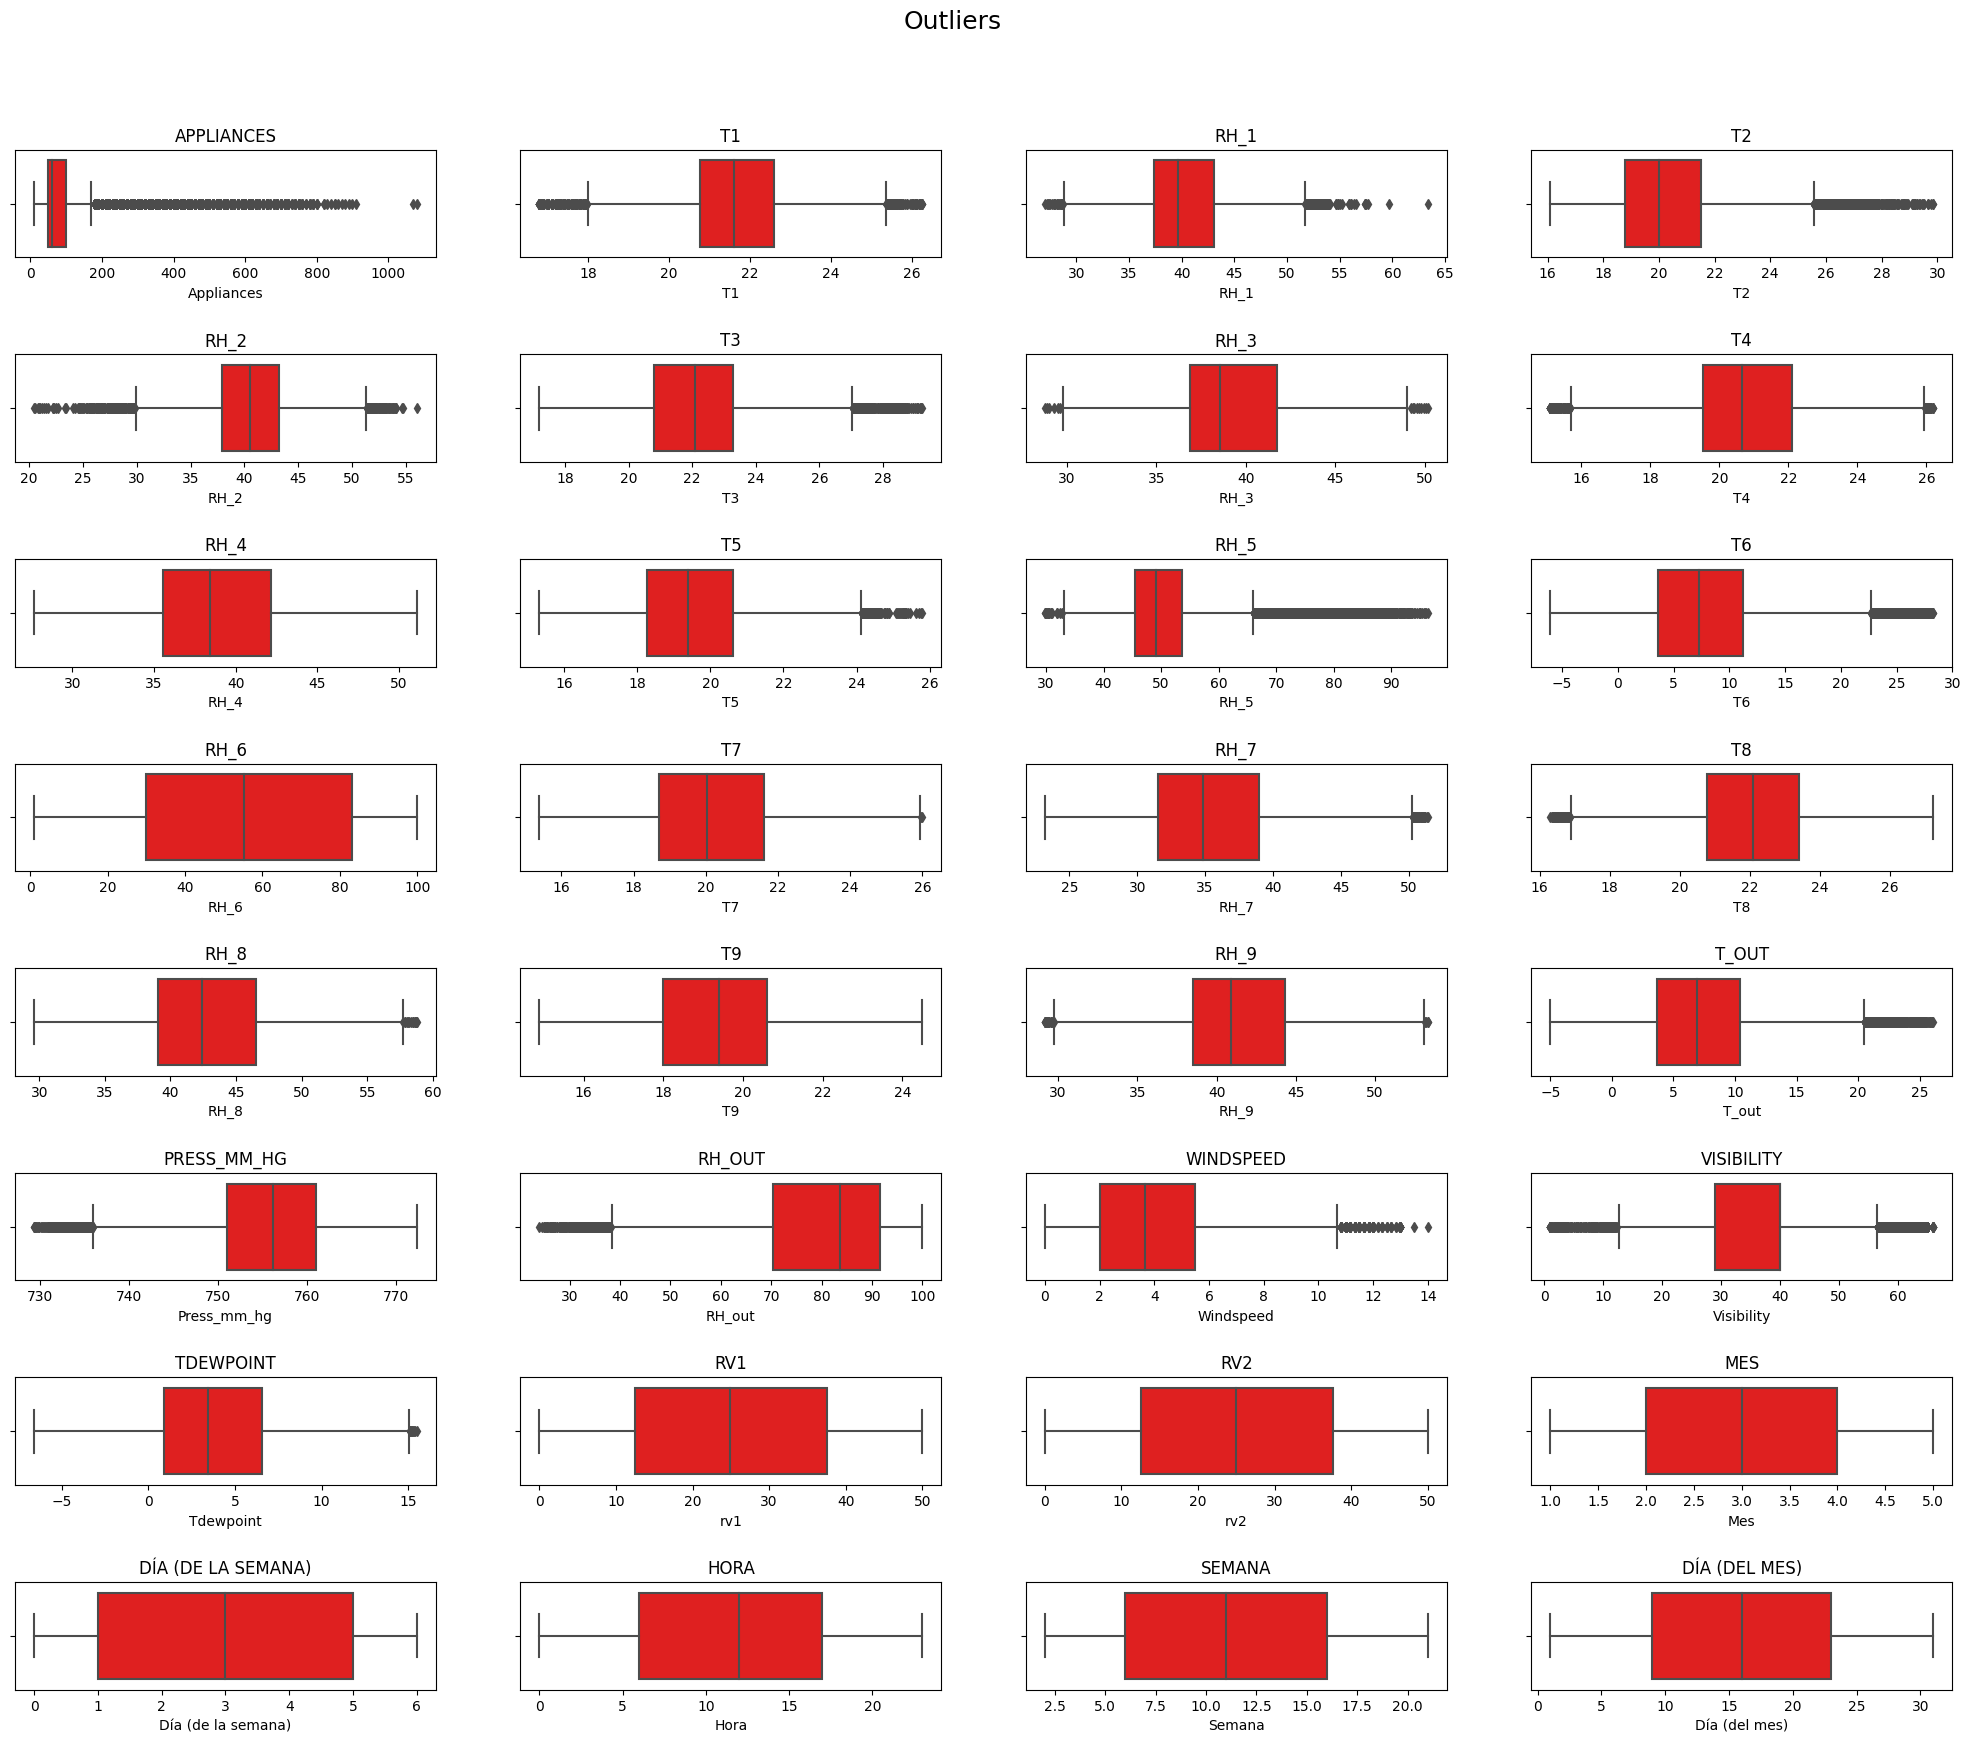

In [13]:
col_list = list(df.describe().columns)
plt.figure(figsize=(25, 20))
plt.suptitle("Outliers", fontsize=18, y=0.95)

for i, columna in enumerate(col_list):
    ax = plt.subplot(8, 4, i + 1)
    plt.subplots_adjust(hspace=0.9, wspace=0.2)
    sns.boxplot(x=df[columna],color='red', ax = ax)
    ax.set_title(columna.upper())

In [14]:
q1 = df.quantile(0.25, numeric_only=True)
q3 = df.quantile(0.75, numeric_only=True)
iqr = q3 - q1
inferior = q1 - 1.5 * iqr
superior = q3 + 1.5 * iqr
outliers_count = df.lt(inferior, axis=1) | df.gt(superior, axis=1)
num_outliers = outliers_count.sum()
print("Outliers por columna: ")
print(num_outliers)

Outliers por columna: 
Appliances            2138
T1                     515
RH_1                   146
T2                     546
RH_2                   235
T3                     217
RH_3                    15
T4                     186
RH_4                     0
T5                     179
RH_5                  1330
T6                     515
RH_6                     0
T7                       2
RH_7                    42
T8                      71
RH_8                    17
T9                       0
RH_9                    21
T_out                  436
Press_mm_hg            219
RH_out                 239
Windspeed              214
Visibility            2522
Tdewpoint               10
rv1                      0
rv2                      0
Mes                      0
Día (de la semana)       0
Hora                     0
Semana                   0
Día (del mes)            0
dtype: int64


In [15]:

df2= df.copy()
for columna in col_list:
  q1 = df2[columna].quantile(0.25) 
  q3 = df2[columna].quantile(0.75)
  iqr = q3 - q1
  lower = q1 - iqr * 1.5
  upper = q3 + iqr * 1.5
  outliers = [x for x in df[columna] if x < lower or x > upper]
  print(len(outliers))
  
  if len(outliers)!=0:
    def bin(row):
      if row[columna]> upper:
        return upper
      if row[columna] < lower:
        return lower
      else:
        return row[columna]


    df[columna] =  df2.apply (lambda row: bin(row), axis=1)

2138
515
146
546
235
217
15
186
0
179
1330
515
0
2
42
71
17
0
21
436
219
239
214
2522
10
0
0
0
0
0
0
0


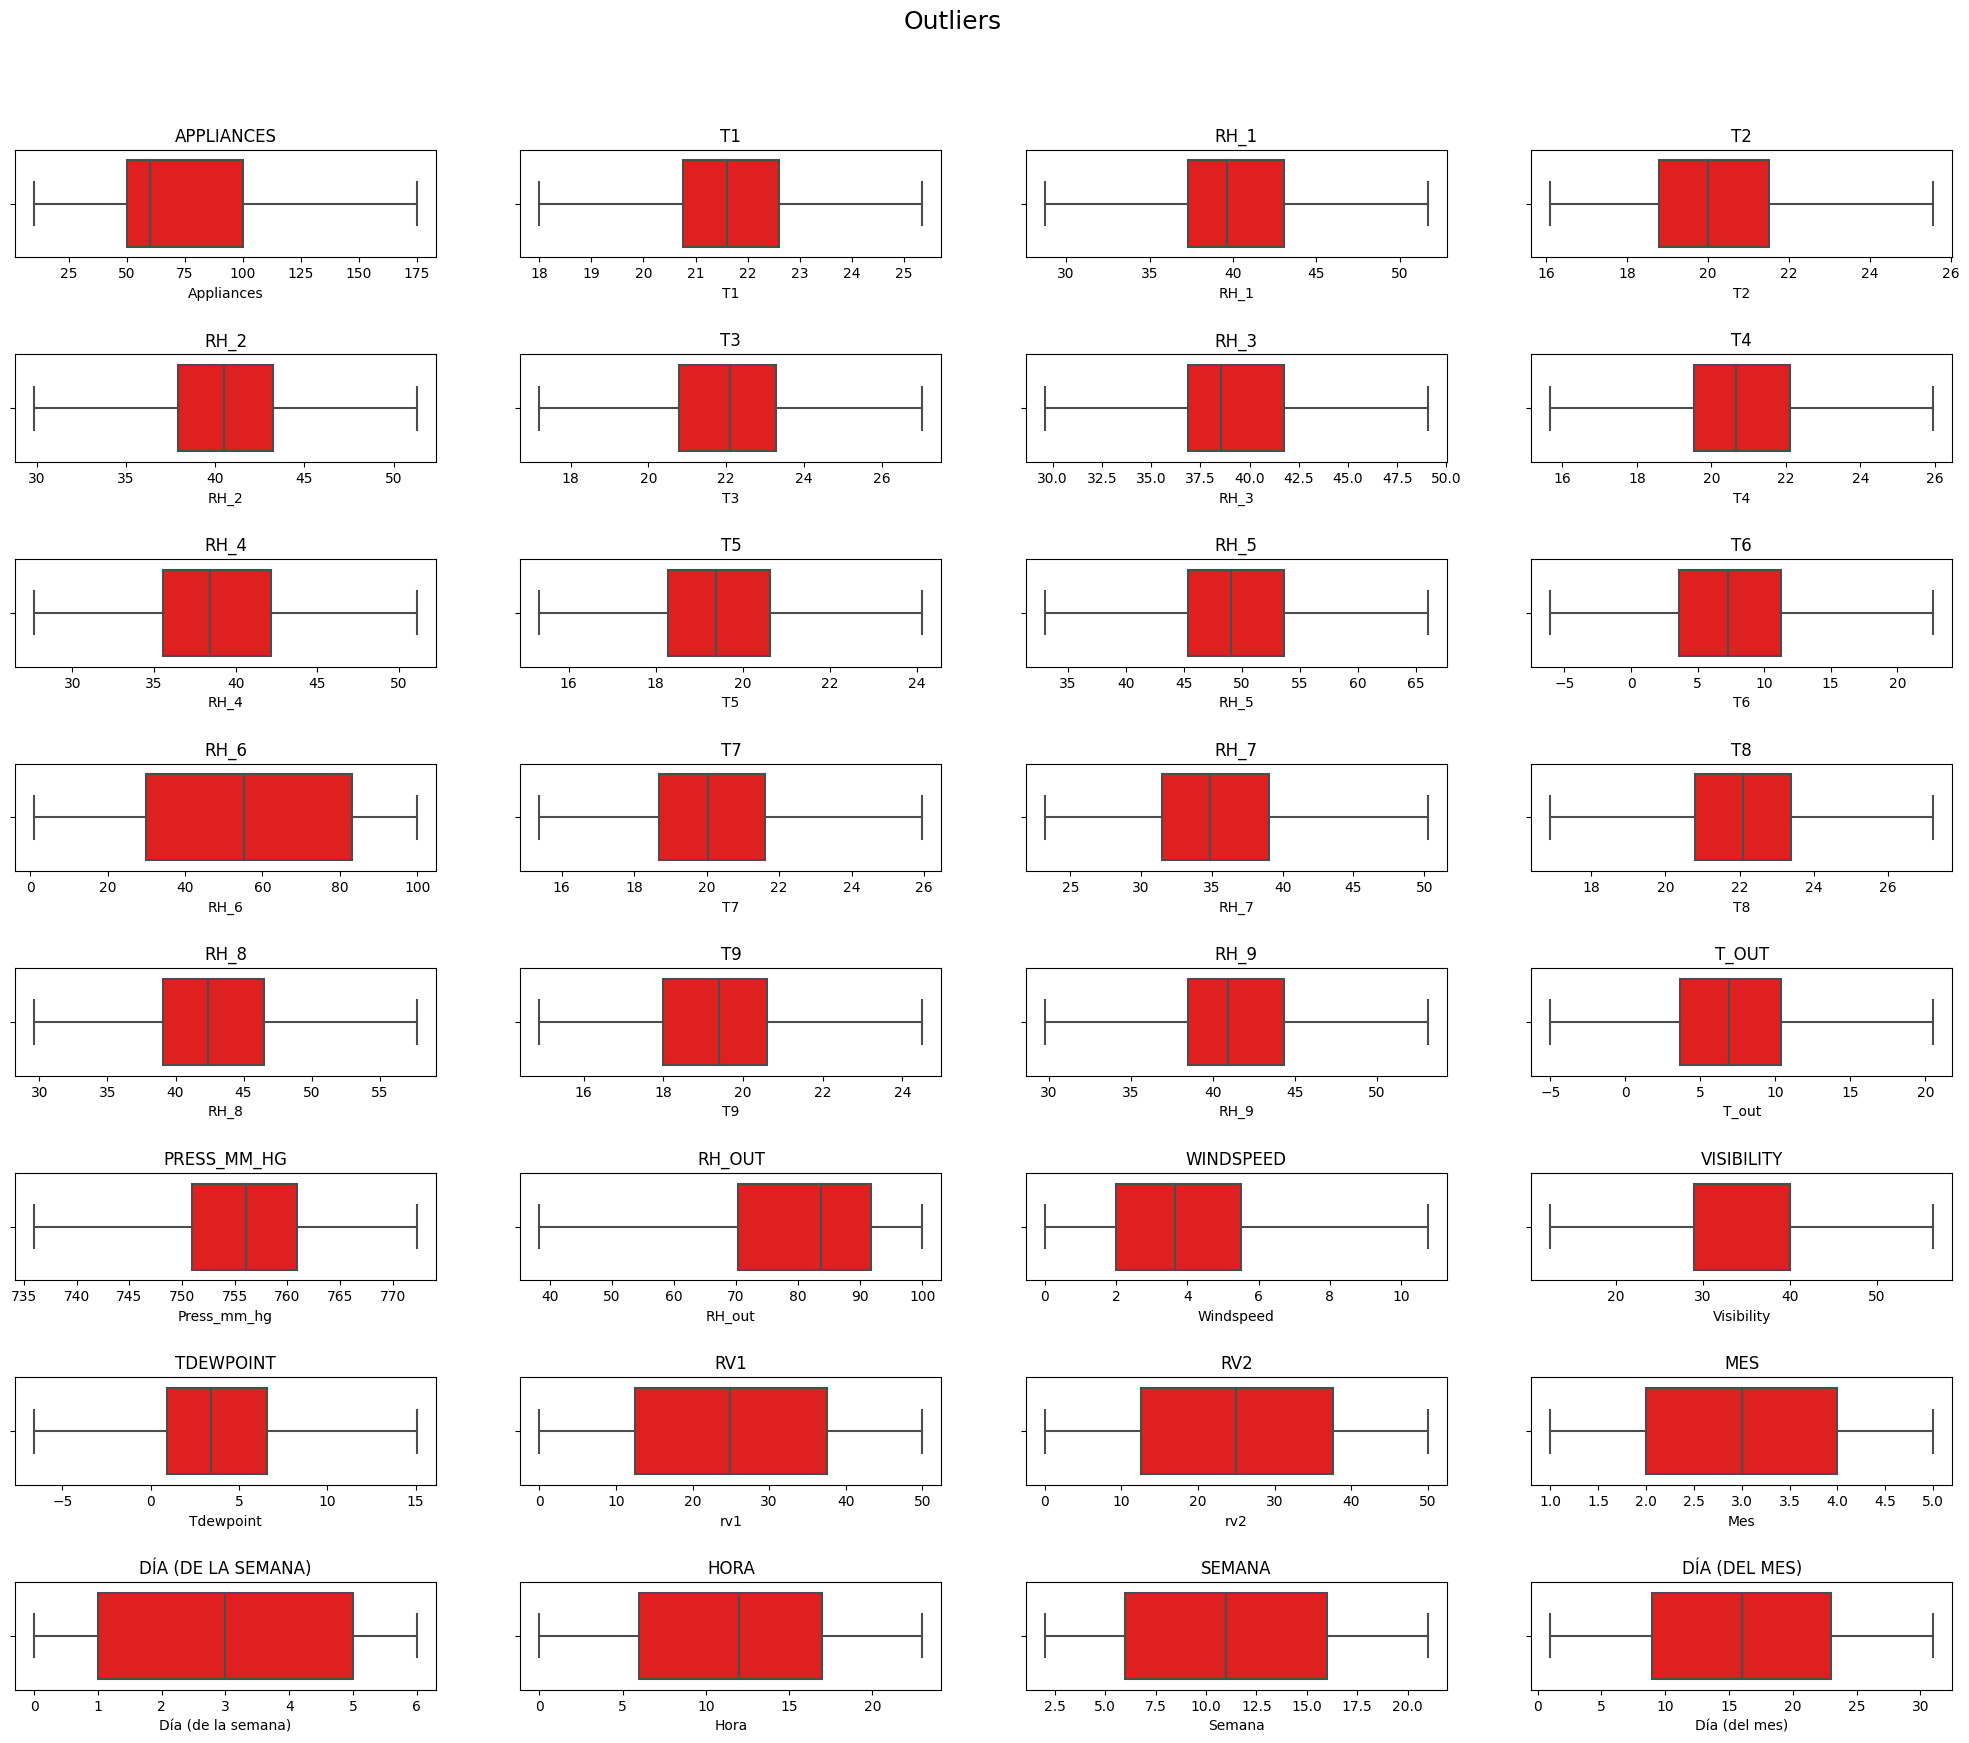

In [16]:
col_list = list(df.describe().columns)
plt.figure(figsize=(25, 20))
plt.suptitle("Outliers", fontsize=18, y=0.95)

for i, columna in enumerate(col_list):
    ax = plt.subplot(8, 4, i + 1)
    plt.subplots_adjust(hspace=0.9, wspace=0.2)
    sns.boxplot(x=df[columna],color='red', ax = ax)
    ax.set_title(columna.upper())

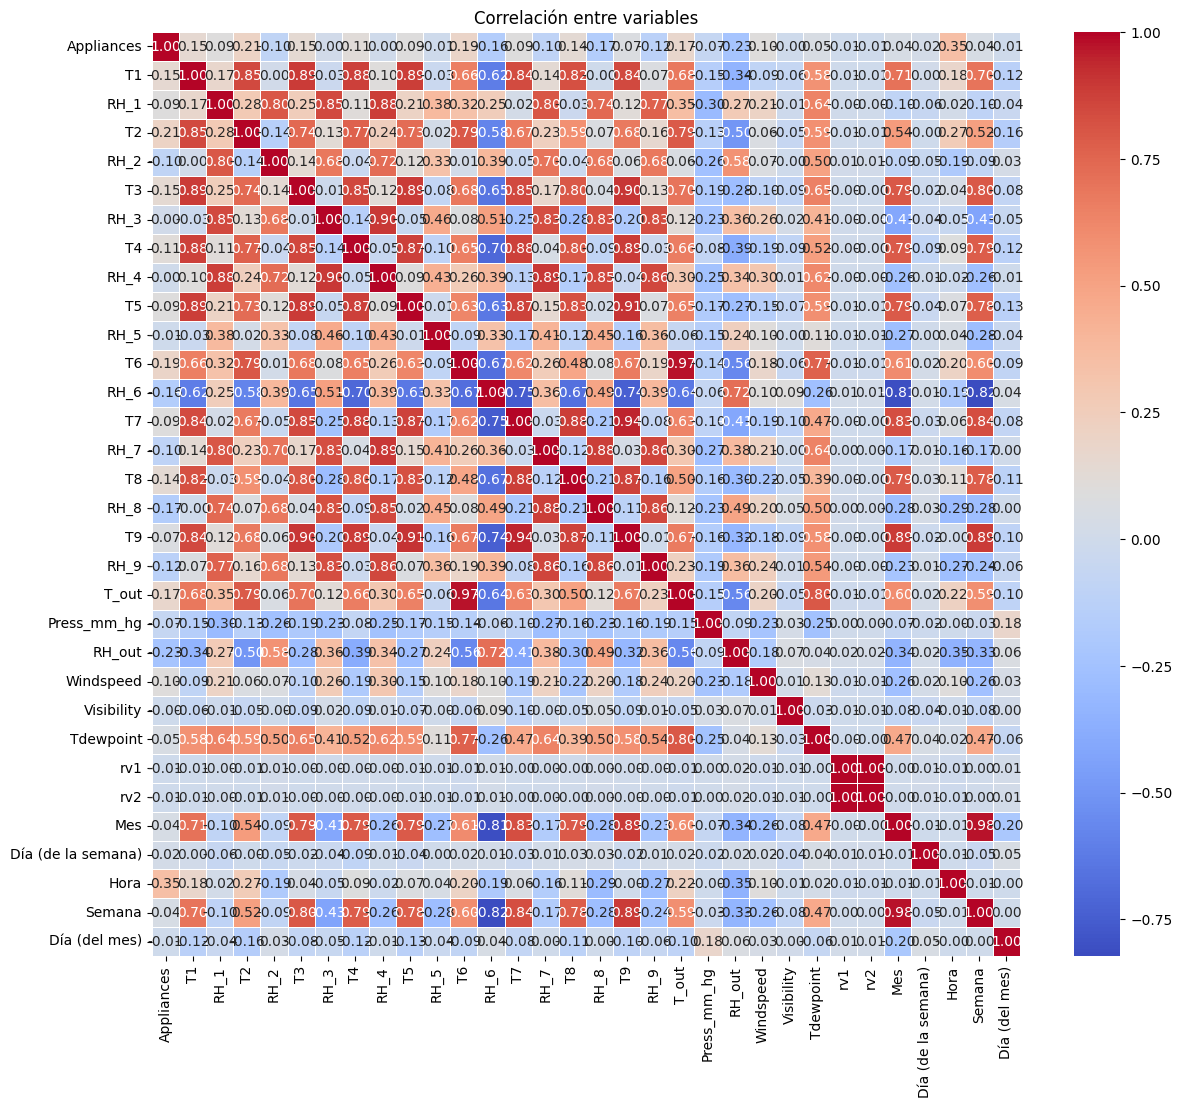

In [17]:
numeric_columns = df.select_dtypes(include='number').columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlación entre variables')
plt.show()

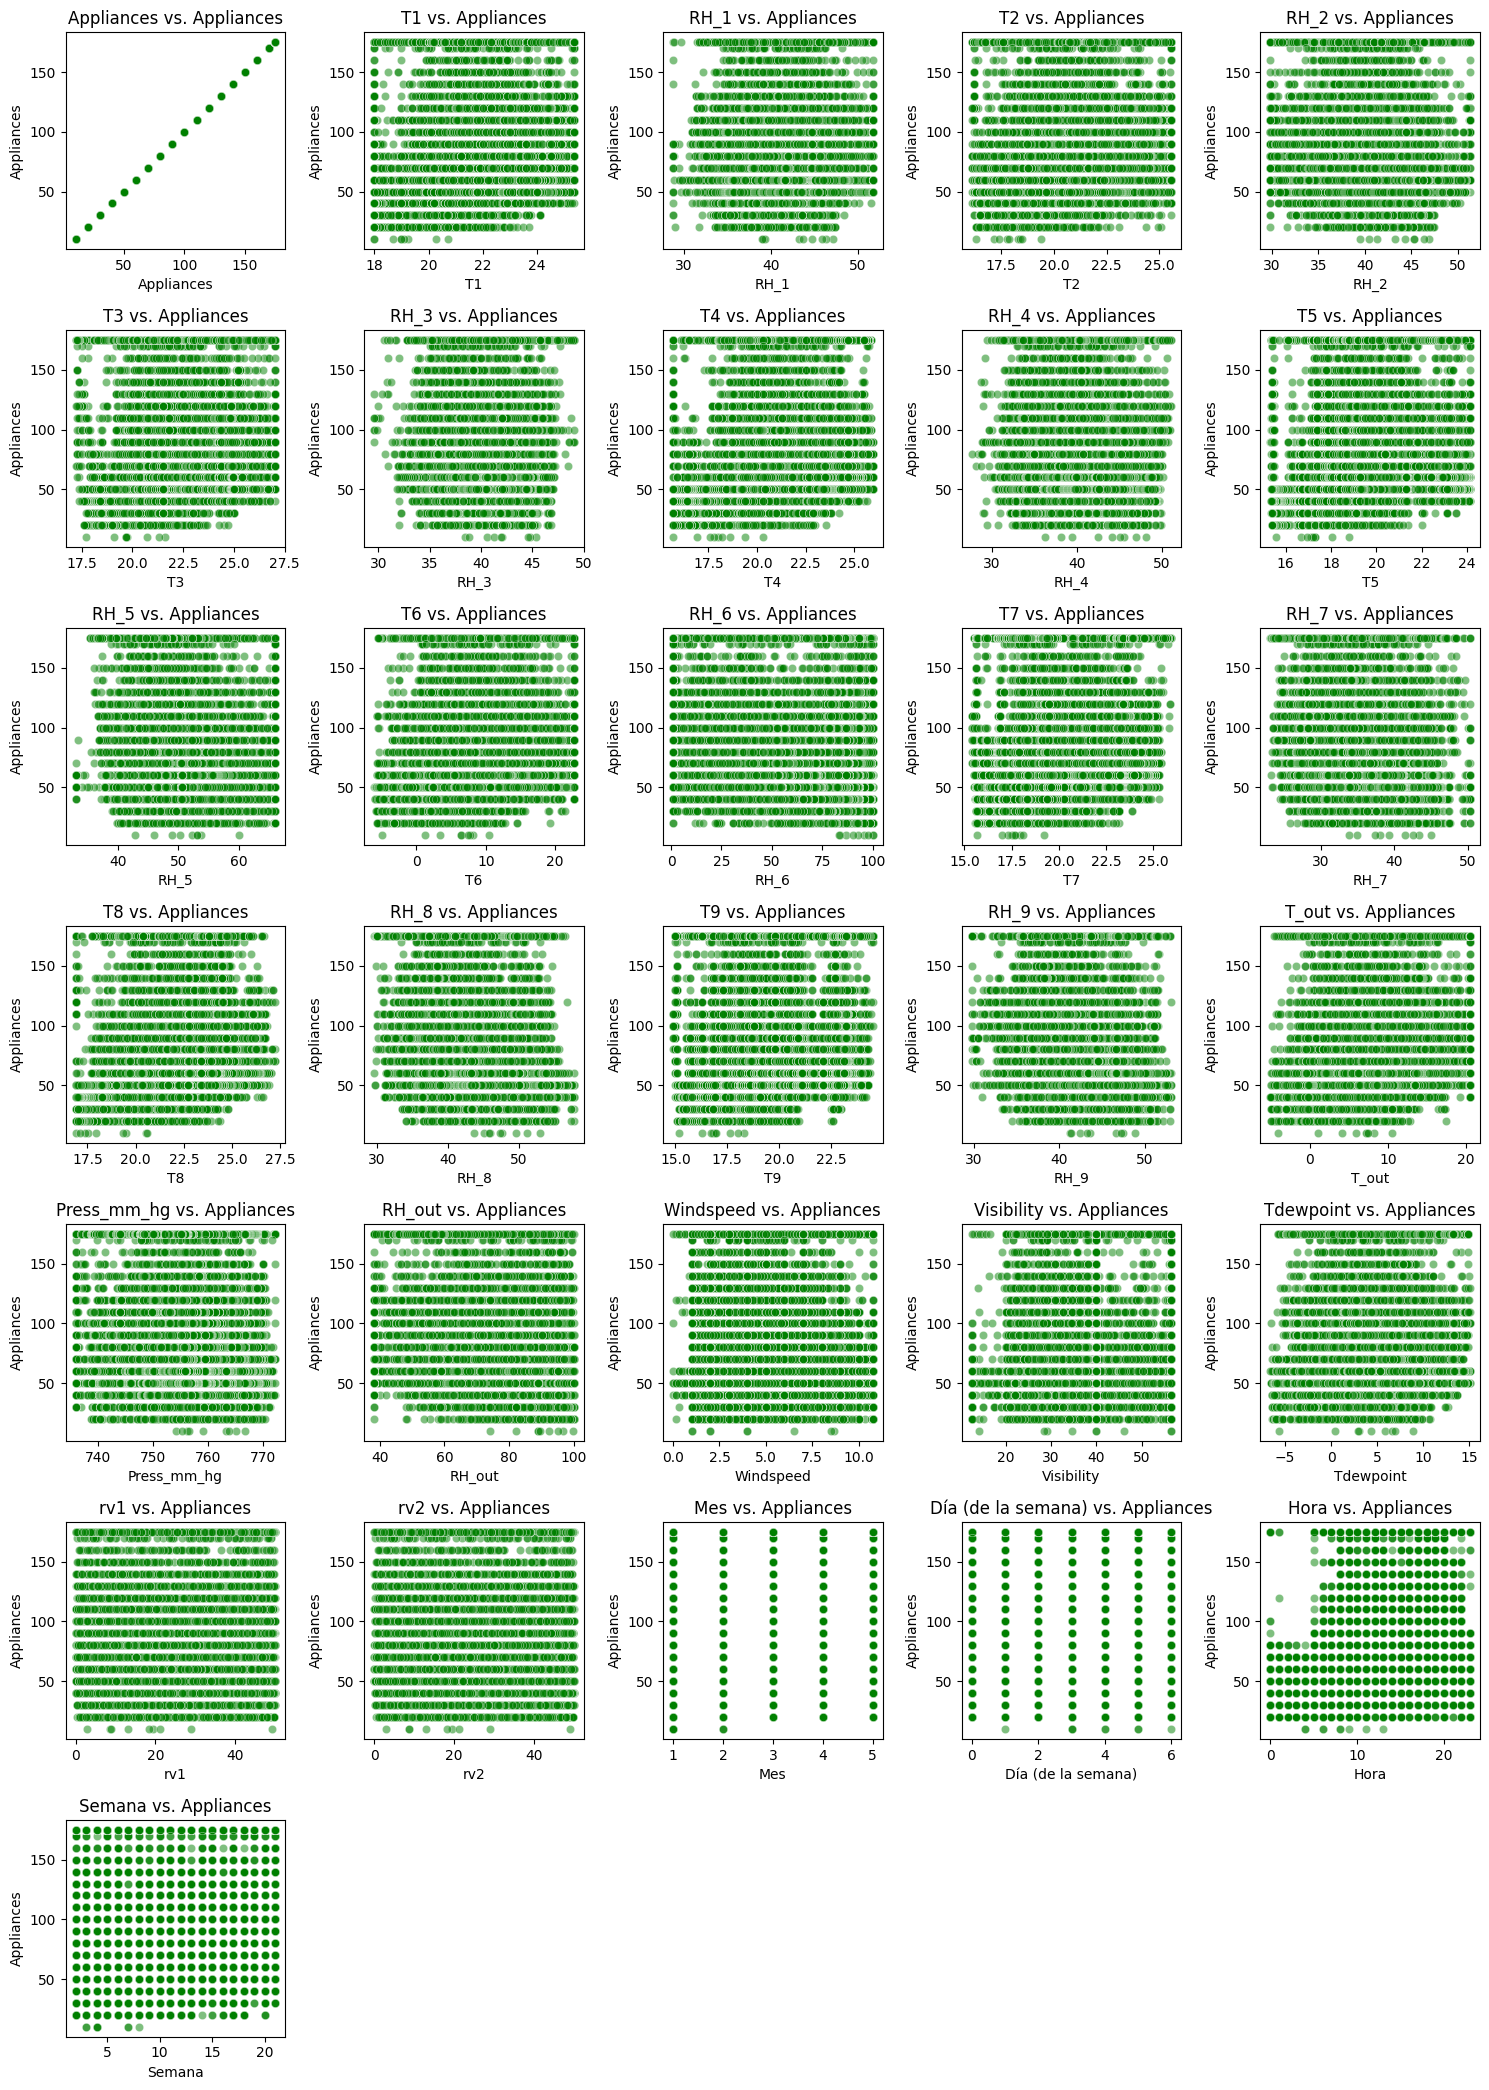

In [18]:
num_columns = len(col_list) - 1  

num_rows = (num_columns // 5) + 1  
num_cols = min(num_columns, 5)  

plt.figure(figsize=(15, 3 * num_rows))

for i, columna in enumerate(col_list[:-1]):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(x=df[columna], y=df['Appliances'], color='green', alpha=0.5)
    plt.title(f'{columna} vs. Appliances')

plt.tight_layout()
plt.show()